In [1]:
import pyaudio
import struct
import numpy as np
from matplotlib import pyplot as plt

In [2]:
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100

In [3]:
p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

data = stream.read(CHUNK)
data_int = np.array(struct.unpack(str(2 * CHUNK) + 'B', data), dtype='b')[::2] + 127 
data_int

array([127, 127, 127, ..., 127, 127, 127], dtype=int8)

(0.0, 2048.0)

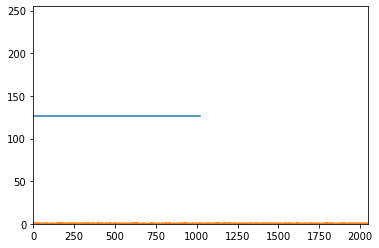

In [4]:
fig, ax = plt.subplots()
ax.plot(data_int, '-')

x = np.arange(0, 2 * CHUNK, 2)
line, = ax.plot(x, np.random.rand(CHUNK))

ax.set_ylim(0, 255)
ax.set_xlim(0, 2 * CHUNK)

In [9]:
%matplotlib tk 

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

fig, ax = plt.subplots()
ax.plot(data_int, '-')

x = np.arange(0, 2 * CHUNK, 2)
line, = ax.plot(x, np.random.rand(CHUNK))

ax.set_ylim(0, 255)
ax.set_xlim(0, 2 * CHUNK)

while True:
    data = stream.read(CHUNK, exception_on_overflow = False)
    data_int = struct.unpack(str(2 * CHUNK) + 'B', data)
    data_int = np.array(data_int, dtype='b')[::2] + 127
    try:
        fig.canvas.draw()
        fig.canvas.flush_events()
    except TclError:
        print("Stopped")

OSError: [Errno -9981] Input overflowed